In [131]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.preprocessing import PolynomialFeatures as pf
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

from scipy.cluster import hierarchy
from sklearn.model_selection import cross_val_predict
import sklearn.model_selection as ms

import statsmodels.api as sm

from pandas.plotting import register_matplotlib_converters

import re

%matplotlib inline
plt.style.use('seaborn-whitegrid')

## Preparing Training Data

In [7]:
bloombergNeg = pd.read_csv("data/labels/bloomberg_labels/bloomberg_neg_train.csv")
bloombergPos = pd.read_csv("data/labels/bloomberg_labels/bloomberg_pos_train.csv")
bloombergNeu = pd.read_csv("data/labels/bloomberg_labels/bloomberg_neu_train.csv")
bloombergTrain = pd.concat([bloombergNeg, bloombergPos, bloombergNeu], ignore_index=True)
bloombergTrain = bloombergTrain[['text', 's_label']]

In [9]:
sandersNeg = pd.read_csv("data/labels/sanders_labels/sanders_neg_train.csv")
sandersPos = pd.read_csv("data/labels/sanders_labels/sanders_pos_train.csv")
sandersNeu = pd.read_csv("data/labels/sanders_labels/sanders_neu_train.csv")
sandersTrain = pd.concat([sandersNeg, sandersPos, sandersNeu], ignore_index=True)
sandersTrain = sandersTrain[['text', 's_label']]

In [14]:
buttigegNeg = pd.read_csv("data/labels/buttigieg_labels/buttigieg_neg_train.csv")
buttigegPos = pd.read_csv("data/labels/buttigieg_labels/buttigieg_pos_train.csv")
buttigegNeu = pd.read_csv("data/labels/buttigieg_labels/buttigieg_neu_train.csv")
buttigiegTrain = pd.concat([buttigegNeg, buttigegPos, buttigegNeu], ignore_index=True)
buttigiegTrain = buttigiegTrain[['text', 's_label']]

In [181]:
bidenNeg = pd.read_csv("data/labels/biden_labels/biden_neg_train.csv")
bidenPos = pd.read_csv("data/labels/biden_labels/biden_pos_train.csv")
bidenNeu = pd.read_csv("data/labels/biden_labels/biden_neu_train.csv")
bidenTrain = pd.concat([bidenNeg, bidenPos, bidenNeu], ignore_index=True)
bidenTrain = buttigieg[['text', 's_label']]

In [198]:
warrenNeg = pd.read_csv("data/labels/warren_labels/warren_neg_train.csv")
warrenPos = pd.read_csv("data/labels/warren_labels/warren_pos_train.csv")
warrenNeu = pd.read_csv("data/labels/warren_labels/warren_neu_train.csv")
warrenTrain = pd.concat([warrenNeg, warrenPos, warrenNeu], ignore_index=True)
warrenTrain = warrenTrain[['text', 's_label']]

In [216]:
klobucharNeg = pd.read_csv("data/labels/klobuchar_labels/klobuchar_neg_train.csv")
klobucharPos = pd.read_csv("data/labels/klobuchar_labels/klobuchar_pos_train.csv")
klobucharNeu = pd.read_csv("data/labels/klobuchar_labels/klobuchar_neu_train.csv")
klobucharTrain = pd.concat([klobucharNeg, klobucharPos, klobucharNeu], ignore_index=True)
klobucharTrain = klobucharTrain[['text', 's_label']]

In [248]:
def delta(series):
    changes = list()
    for i in range(1,series.size):
        changes.append(series[i] - series[i-1])
    changes = pd.Series(changes)
    changes = changes.fillna(0)
    return changes

## Buttigieg

In [85]:
buttigiegFull = pd.read_csv("data/tweets_full/buttigieg_full.csv")

In [19]:
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df

In [217]:
bloombergTrain = clean_text(bloombergTrain, "text")
buttigiegTrain = clean_text(buttigiegTrain, "text")
sandersTrain = clean_text(sandersTrain, "text")
bidenTrain = clean_text(bidenTrain, "text")
warrenTrain = clean_text(warrenTrain, "text")
klobucharTrain = clean_text(klobucharTrain, "text")

In [28]:
pipeline_sgd = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf',  TfidfTransformer()),
    ('nb', SGDClassifier()),
])

In [412]:
X_train, X_test, y_train, y_test = train_test_split(sandersTrain['text'],
                                                    sandersTrain['s_label'],random_state = 0)
model = pipeline_sgd.fit(X_train, y_train)
y_predict = model.predict(X_test)
f1_score(y_test, y_predict, average="macro")

0.5292397660818714

In [403]:
model = pipeline_sgd.fit(bidenTrain['text'], bidenTrain['s_label'])
y_predict = model.predict(bidenFull['text'])

In [387]:
bidenFreq = dict()
for i in y_predict:
    i = i.item()
    if i not in bidenFreq:
        bidenFreq[i] = 1
    else:
        bidenFreq[i] += 1

In [388]:
bidenFreq

{-1: 5991, 0: 34044, 1: 9772}

In [94]:
type(y_predict)

numpy.ndarray

In [95]:
buttigiegSentiment = pd.Series(y_predict)

In [96]:
buttigiegSentiment

0      -1
1       1
2       1
3       1
4       1
       ..
6156    1
6157    0
6158    0
6159    1
6160    0
Length: 6161, dtype: int64

In [97]:
buttigiegFull['sentiment'] = buttigiegSentiment

In [98]:
buttigiegFull

,tweetid,date,text,favorites,retweets,location,sentiment
0,1144416035375898627,2019-06-28,Pete Buttigieg is James Madison reincarnated,0.0,0.0,United States,-1
1,810262559613919232,2016-12-17,"More Democrats like this, please: ""A letter fr...",0.0,0.0,United States,1
2,817842044785790981,2017-01-07,#Bernie fan 16 yrs before it was cool. \nProgr...,0.0,0.0,United States,1
3,822225176339382273,2017-01-19,@AbiWilks I like him but I'm pulling for longs...,0.0,0.0,United States,1
4,826811241775689728,2017-02-01,I have such a crush on Pete Buttigieg.,0.0,0.0,United States,1
...,...,...,...,...,...,...,...
6156,1235647846378098688,2020-03-05,@DavidCornDC @ewarren Well she wasn't the smar...,0.0,0.0,United States,1
6157,1235798531350257670,2020-03-06,1. Elizabeth Warren\n2. Julian Castro\n3. Bern...,0.0,0.0,United States,0
6158,1236495161548570624,2020-03-08,Pete Buttigieg_Thank-You to Supporters https:/...,0.0,0.0,United States,0
6159,1236520096136396803,2020-03-08,Pete Buttigieg Birthday Party in the Cedar Rap...,0.0,0.0,United States,1


In [101]:
pd.to_datetime(buttigiegFull.date[0])

Timestamp('2019-06-28 00:00:00')

In [104]:
ts = list()
for index, row in buttigiegFull.iterrows():
    ts.append(pd.to_datetime(row['date']))

In [105]:
buttigiegFull['ts'] = pd.Series(ts)

In [106]:
buttigiegFull

,tweetid,date,text,favorites,retweets,location,sentiment,ts
0,1144416035375898627,2019-06-28,Pete Buttigieg is James Madison reincarnated,0.0,0.0,United States,-1,2019-06-28
1,810262559613919232,2016-12-17,"More Democrats like this, please: ""A letter fr...",0.0,0.0,United States,1,2016-12-17
2,817842044785790981,2017-01-07,#Bernie fan 16 yrs before it was cool. \nProgr...,0.0,0.0,United States,1,2017-01-07
3,822225176339382273,2017-01-19,@AbiWilks I like him but I'm pulling for longs...,0.0,0.0,United States,1,2017-01-19
4,826811241775689728,2017-02-01,I have such a crush on Pete Buttigieg.,0.0,0.0,United States,1,2017-02-01
...,...,...,...,...,...,...,...,...
6156,1235647846378098688,2020-03-05,@DavidCornDC @ewarren Well she wasn't the smar...,0.0,0.0,United States,1,2020-03-05
6157,1235798531350257670,2020-03-06,1. Elizabeth Warren\n2. Julian Castro\n3. Bern...,0.0,0.0,United States,0,2020-03-06
6158,1236495161548570624,2020-03-08,Pete Buttigieg_Thank-You to Supporters https:/...,0.0,0.0,United States,0,2020-03-08
6159,1236520096136396803,2020-03-08,Pete Buttigieg Birthday Party in the Cedar Rap...,0.0,0.0,United States,1,2020-03-08


In [110]:
buttigiegFull['test']= pd.to_datetime(buttigiegFull['ts']) - pd.to_timedelta(7, unit='d')

In [122]:
b = buttigiegFull.groupby([pd.Grouper(key='test', freq='W-MON')])['sentiment'].mean().reset_index().sort_values('test')

In [123]:
b

,test,sentiment
0,2016-05-02,1.000000
1,2016-05-09,NaN
2,2016-05-16,NaN
3,2016-05-23,NaN
4,2016-05-30,0.000000
...,...,...
196,2020-02-03,0.195462
197,2020-02-10,0.248201
198,2020-02-17,0.313131
199,2020-02-24,0.373673


In [124]:
b.to_csv("b.csv")

In [127]:
b = b.fillna(method="ffill")

In [128]:
b.to_csv("b.csv")

Text(0.5, 0, 'Date')

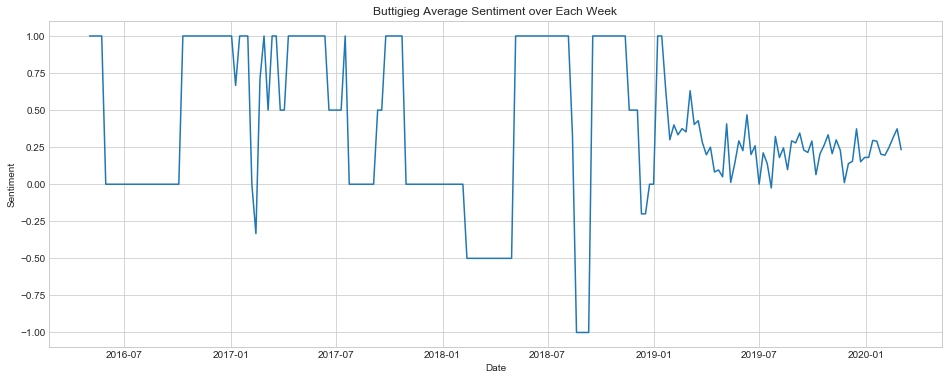

In [137]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(x=b["test"], y=b["sentiment"], data=b)
plt.title("Buttigieg Average Sentiment over Each Week")
ax.set_ylabel("Sentiment")
ax.set_xlabel("Date")

## Sanders

In [139]:
sandersFull = pd.read_csv("data/tweets_full/sanders_full.csv", index_col = None, header=0, engine='python')

In [140]:
sandersFull

,tweetid,date,text,favorites,retweets,location
0,677808959424622592,2015-12-18,Bernie Sanders campaign accessed Hillary Clint...,0.0,0.0,United States
1,677842280498073600,2015-12-18,Bernie Sanders wins the day https://t.co/a3wLx...,0.0,0.0,United States
2,677871498841862144,2015-12-18,Related: @moveon PETITION to Debbie Wasserman ...,0.0,0.0,United States
3,677877872598454273,2015-12-18,Bernie Sanders Staffer playing dirty against H...,0.0,0.0,United States
4,677880021436858368,2015-12-18,Debbie Wasserman Schultz: Give the voter file ...,0.0,0.0,United States
...,...,...,...,...,...,...
97449,1236804133539078144,2020-03-09,“We need mini golf reform and Bernie Sanders i...,0.0,0.0,United States
97450,1236814443058794498,2020-03-09,'I think we've got a great shot to win in Mich...,0.0,0.0,United States
97451,1236828913881366528,2020-03-09,Bernie Sanders is 100 percent a legitimate Wor...,0.0,0.0,United States
97452,1236840116179648517,2020-03-09,"No one cares about Bernie sanders except us, t...",0.0,0.0,United States


In [144]:
model = pipeline_sgd.fit(sandersTrain['text'], sandersTrain['s_label'])
sanders_predict = model.predict(sandersFull['text'])

In [148]:
freq = dict()
for i in sanders_predict:
    i = i.item()
    if i not in freq:
        freq[i] = 1
    else:
        freq[i] += 1
freq
sandersFull['sentiment'] = sanders_predict

In [395]:
pd.set_option('display.max_colwidth', -1)
sandersFull[['text', 'sentiment']][0:10]

,text,sentiment
0,Bernie Sanders campaign accessed Hillary Clinton’s confidential voter information https://t.co/NTee8ghs1N…@HillaryClinton @SenWarren,-1
1,Bernie Sanders wins the day https://t.co/a3wLxr65HL #copolitics #coleg #Colorado #Denver #Boulder,1
2,Related: @moveon PETITION to Debbie Wasserman Schultz: Give voter file back to #Bernie Sanders' campaign https://t.co/1ywPE92L1R cc @drshow,0
3,Bernie Sanders Staffer playing dirty against Hillary Clinton #BernieSanders\n#djB_MonEy,-1
4,Debbie Wasserman Schultz: Give the voter file back to Bernie Sanders' campaign https://t.co/KuRMSmsM7G @moveon This is important.,0
5,Bernie Sanders will not get us free college. Im sorry. This has to stop being propogated in the social media liberal community.,-1
6,What else did Bernie Sanders STEAL! In today society people can steal your entire life with just your address. Plus they have our full name?,-1
7,Debbie Wasserman Schultz: Give the voter file back to Bernie Sanders' campaign https://t.co/hf65S6fMhD @MoveOn @TheDemocrats @BernieSanders,0
8,"Sorry, this Bernie Sanders data breach has a funny smell to it. #ThingsThatMakeYouGoHmmm",-1
9,Bernie Sanders Campaign Locked Out Of Key Voter File After Data Breach https://t.co/LttN6ZaT9S,0


In [153]:
ts = list()
for index, row in sandersFull.iterrows():
    try:
        ts.append(pd.to_datetime(row['date']))
    except:
        ts.append(0)

In [160]:
bad = 0
for i in range(0,len(ts)):
    if ts[i] == 0:
        ts[i] = ts[i-1]
bad
sandersFull['ts'] = pd.Series(ts)

In [161]:
sandersFull['test']= pd.to_datetime(sandersFull['ts']) - pd.to_timedelta(7, unit='d')

In [162]:
sandersFull['test']= pd.to_datetime(sandersFull['ts']) - pd.to_timedelta(7, unit='d')
s = sandersFull.groupby([pd.Grouper(key='test', freq='W-MON')])['sentiment'].mean().reset_index().sort_values('test')

In [163]:
s

,test,sentiment
0,2015-11-16,0.833333
1,2015-11-23,0.199507
2,2015-11-30,0.197080
3,2015-12-07,0.289809
4,2015-12-14,0.142289
...,...,...
220,2020-02-03,0.156184
221,2020-02-10,0.148583
222,2020-02-17,0.153317
223,2020-02-24,0.081324


Text(0.5, 0, 'Date')

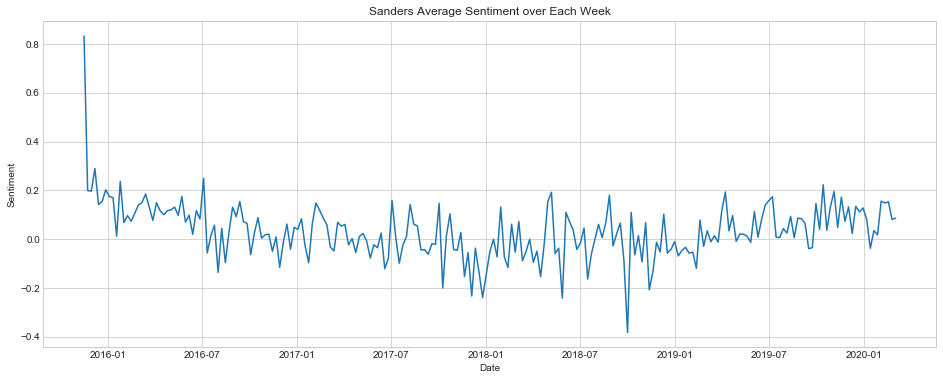

In [164]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(x=s["test"], y=s["sentiment"], data=b)
plt.title("Sanders Average Sentiment over Each Week")
ax.set_ylabel("Sentiment")
ax.set_xlabel("Date")

## Bloomberg

In [185]:
bloombergFull = pd.read_csv("data/tweets_full/bloomberg_full.csv")

In [197]:
bloombergFull

,tweetid,date,text,favorites,retweets,location,s_label,sentiment,ts,test
0,685222562431766528,2016-01-07,#tbt That time when Cass and I played at a Mik...,0.0,0.0,United States,0,0,2016-01-07,2015-12-31
1,687151925574381568,2016-01-13,"Don't fret @CharmianNeary, Mike Bloomberg has ...",0.0,0.0,United States,-1,-1,2016-01-13,2016-01-06
2,690918632390574080,2016-01-23,Mike Bloomberg Candidacy is a vote I can cast ...,0.0,0.0,United States,1,1,2016-01-23,2016-01-16
3,691385675913007109,2016-01-24,"https://t.co/XdH6DiqMJn - God help me, I’d vot...",0.0,0.0,United States,-1,-1,2016-01-24,2016-01-17
4,691993828274892800,2016-01-26,I hope Mike Bloomberg runs for president as an...,0.0,0.0,United States,1,1,2016-01-26,2016-01-19
...,...,...,...,...,...,...,...,...,...,...
3870,1235754134483152898,2020-03-06,Dump Trump | Mike Bloomberg for President http...,0.0,0.0,United States,0,1,2020-03-06,2020-02-28
3871,1235976072350625792,2020-03-06,Do you know how stupid that sounds to most Ame...,0.0,0.0,United States,0,1,2020-03-06,2020-02-28
3872,1236127585941237762,2020-03-07,@JoeBiden @MikeBloomberg President Joe Biden a...,0.0,0.0,United States,0,1,2020-03-07,2020-02-29
3873,1236151431825985537,2020-03-07,"纽约的两名確診新冠狀病毒患者参加了AIPAC，其他参会者包括Mike Pompeo, Mit...",0.0,0.0,United States,0,-1,2020-03-07,2020-02-29


In [186]:
model = pipeline_sgd.fit(bloombergTrain['text'], bloombergTrain['s_label'])
bloomberg_predict = model.predict(bloombergFull['text'])

In [187]:
bloombergFull['sentiment'] = pd.Series(bloomberg_predict)

In [188]:
ts = list()
for index, row in bloombergFull.iterrows():
    try:
        ts.append(pd.to_datetime(row['date']))
    except:
        ts.append(0)
bad = 0
for i in range(0,len(ts)):
    if ts[i] == 0:
        ts[i] = ts[i-1]
bloombergFull['ts'] = pd.Series(ts)

In [189]:
bloombergFull['test']= pd.to_datetime(bloombergFull['ts']) - pd.to_timedelta(7, unit='d')
bloom = bloombergFull.groupby([pd.Grouper(key='test', freq='W-MON')])['sentiment'].mean().reset_index().sort_values('test')

In [190]:
bloom

,test,sentiment
0,2015-11-23,0.000000
1,2015-11-30,0.000000
2,2015-12-07,0.666667
3,2015-12-14,-1.000000
4,2015-12-21,0.333333
...,...,...
219,2020-02-03,0.011673
220,2020-02-10,-0.055344
221,2020-02-17,-0.050963
222,2020-02-24,-0.035242


Text(0.5, 0, 'Date')

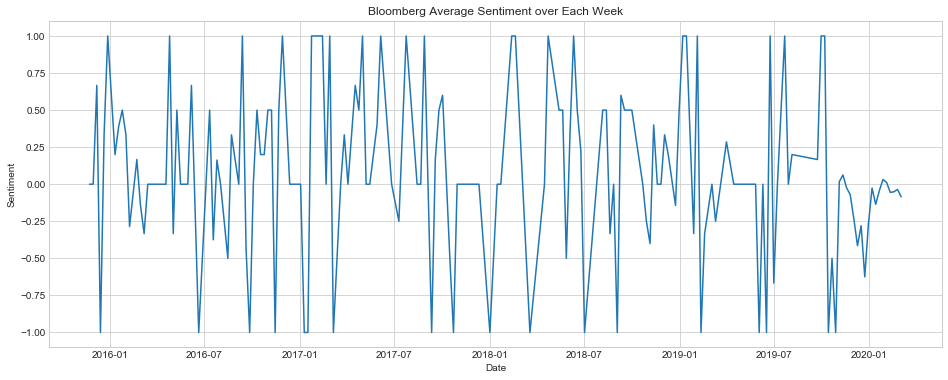

In [191]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(x=bloom["test"], y=bloom["sentiment"], data=b)
plt.title("Bloomberg Average Sentiment over Each Week")
ax.set_ylabel("Sentiment")
ax.set_xlabel("Date")

## Biden

In [193]:
bidenFull = pd.read_csv("data/tweets_full/biden_full.csv")
model = pipeline_sgd.fit(bidenTrain['text'], bidenTrain['s_label'])
biden_predict = model.predict(bidenFull['text'])
bidenFull['sentiment'] = pd.Series(biden_predict)
ts = list()
for index, row in bidenFull.iterrows():
    try:
        ts.append(pd.to_datetime(row['date']))
    except:
        ts.append(0)
bad = 0
for i in range(0,len(ts)):
    if ts[i] == 0:
        ts[i] = ts[i-1]
bidenFull['ts'] = pd.Series(ts)
bidenFull['test']= pd.to_datetime(bidenFull['ts']) - pd.to_timedelta(7, unit='d')
bid = bidenFull.groupby([pd.Grouper(key='test', freq='W-MON')])['sentiment'].mean().reset_index().sort_values('test')

In [194]:
bid

,test,sentiment
0,2015-11-16,1.000000
1,2015-11-23,0.000000
2,2015-11-30,0.033333
3,2015-12-07,0.064516
4,2015-12-14,0.000000
...,...,...
220,2020-02-03,0.043593
221,2020-02-10,0.060674
222,2020-02-17,0.062500
223,2020-02-24,0.083955


Text(0.5, 0, 'Date')

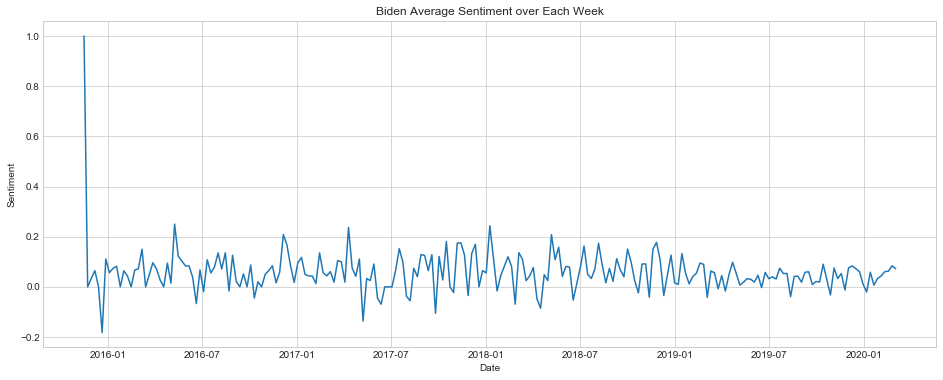

In [196]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(x=bid["test"], y=bid["sentiment"], data=b)
plt.title("Biden Average Sentiment over Each Week")
ax.set_ylabel("Sentiment")
ax.set_xlabel("Date")

In [202]:
count = 0
for index, row in warrenFull.iterrows():
    if(row['text'] == np.nan):
        count += 1
count

0

## Warren

In [211]:
warrenFull = pd.read_csv("data/tweets_full/warren_full.csv")
warrenFull['text'] = warrenFull.text.fillna('')
warrenFull

,tweetid,date,text,favorites,retweets,location
0,683414547005337601,2016-01-02,Elizabeth Warren SLAMS Hillary Clinton With Mo...,0.0,0.0,United States
1,684962737483595776,2016-01-07,"I appreciate the work Hilary Clinton has done,...",0.0,0.0,United States
2,685323287195430912,2016-01-08,Elizabeth Warren: Wake up Liz! We need you to ...,0.0,0.0,United States
3,685507145119449088,2016-01-08,"@BernieSanders Sir, if we pick Elizabeth Warre...",0.0,0.0,United States
4,685658618813935616,2016-01-09,It's a rare man who can steer Elizabeth Warren...,0.0,0.0,United States
...,...,...,...,...,...,...
35501,1236823533457534979,2020-03-09,I love Elizabeth Warren 😂,0.0,0.0,United States
35502,1236842814735929344,2020-03-09,Sen. Elizabeth Warren leaving the race made th...,0.0,0.0,United States
35503,1236846142098419713,2020-03-09,@danielmarans @JinokAnderson Is Elizabeth Warr...,0.0,0.0,United States
35504,1236865594986815489,2020-03-09,“My name is Elizabeth and I'm running for pres...,0.0,0.0,United States


In [212]:
model = pipeline_sgd.fit(warrenTrain['text'], warrenTrain['s_label'])
warren_predict = model.predict(warrenFull['text'])

In [213]:
warrenFull = pd.read_csv("data/tweets_full/warren_full.csv")
warrenFull['text'] = warrenFull.text.fillna('')
model = pipeline_sgd.fit(warrenTrain['text'], warrenTrain['s_label'])
warren_predict = model.predict(warrenFull['text'])
warrenFull['sentiment'] = pd.Series(warren_predict)
ts = list()
for index, row in warrenFull.iterrows():
    try:
        ts.append(pd.to_datetime(row['date']))
    except:
        ts.append(0)
bad = 0
for i in range(0,len(ts)):
    if ts[i] == 0:
        ts[i] = ts[i-1]
warrenFull['ts'] = pd.Series(ts)
warrenFull['test']= pd.to_datetime(warrenFull['ts']) - pd.to_timedelta(7, unit='d')
war = warrenFull.groupby([pd.Grouper(key='test', freq='W-MON')])['sentiment'].mean().reset_index().sort_values('test')

In [214]:
war

,test,sentiment
0,2015-11-16,0.000000
1,2015-11-23,0.200000
2,2015-11-30,-0.148148
3,2015-12-07,-0.187500
4,2015-12-14,0.333333
...,...,...
220,2020-02-03,-0.021277
221,2020-02-10,0.035461
222,2020-02-17,0.118987
223,2020-02-24,0.121593


Text(0.5, 0, 'Date')

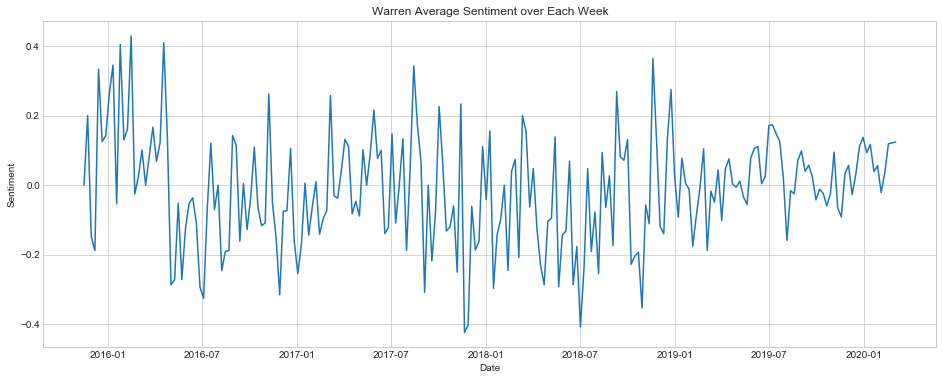

In [215]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(x=war["test"], y=war["sentiment"], data=b)
plt.title("Warren Average Sentiment over Each Week")
ax.set_ylabel("Sentiment")
ax.set_xlabel("Date")

## Klobuchar

In [218]:
klobucharFull = pd.read_csv("data/tweets_full/klobuchar_full.csv")
klobucharFull['text'] = klobucharFull.text.fillna('')
model = pipeline_sgd.fit(klobucharTrain['text'], klobucharTrain['s_label'])
klobuchar_predict = model.predict(klobucharFull['text'])
klobucharFull['sentiment'] = pd.Series(klobuchar_predict)
ts = list()
for index, row in klobucharFull.iterrows():
    try:
        ts.append(pd.to_datetime(row['date']))
    except:
        ts.append(0)
bad = 0
for i in range(0,len(ts)):
    if ts[i] == 0:
        ts[i] = ts[i-1]
klobucharFull['ts'] = pd.Series(ts)
klobucharFull['test']= pd.to_datetime(klobucharFull['ts']) - pd.to_timedelta(7, unit='d')
klob = klobucharFull.groupby([pd.Grouper(key='test', freq='W-MON')])['sentiment'].mean().reset_index().sort_values('test')

In [219]:
klob

,test,sentiment
0,2015-11-23,0.000000
1,2015-11-30,1.000000
2,2015-12-07,1.000000
3,2015-12-14,1.000000
4,2015-12-21,NaN
...,...,...
219,2020-02-03,-0.212963
220,2020-02-10,-0.194030
221,2020-02-17,-0.245059
222,2020-02-24,-0.306189


Text(0.5, 0, 'Date')

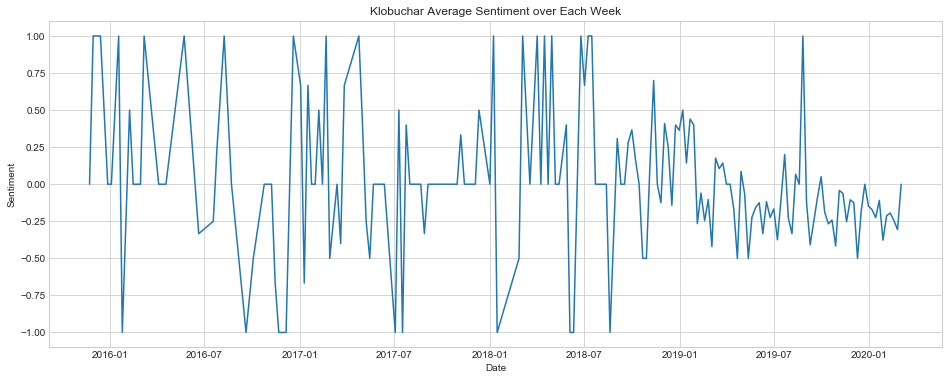

In [339]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(x=klob["test"], y=klob["sentiment"])
plt.title("Klobuchar Average Sentiment over Each Week")
ax.set_ylabel("Sentiment")
ax.set_xlabel("Date")

## Changes

In [321]:
klobChange = delta(klob['sentiment'])

In [322]:
warrenChange = delta(war['sentiment'])

In [323]:
bidenChange = delta(bid['sentiment'])

In [324]:
bloombergChange = delta(bloom['sentiment'])

In [325]:
buttigiegChange = delta(b['sentiment'])

In [326]:
sandersChange = delta(s['sentiment'])

In [327]:
klobDF = pd.DataFrame(klobChange)
warrenDF = pd.DataFrame(warrenChange)
bidenDF = pd.DataFrame(bidenChange)
bloombergDF = pd.DataFrame(bloombergChange)
buttigiegDF = pd.DataFrame(buttigiegChange)
sandersDF = pd.DataFrame(sandersChange)

In [328]:
klobDF.loc[-1] = [np.nan]  # adding a row
klobDF.index = klobDF.index + 1  # shifting index
klobDF = klobDF.sort_index()  # sorting by index
klobDF['time'] = klob['test']
klobDF.columns = ['change', 'time']

In [331]:
warrenDF.loc[-1] = [np.nan]  # adding a row
warrenDF.index = warrenDF.index + 1  # shifting index
warrenDF = warrenDF.sort_index()  # sorting by index
warrenDF['time'] = war['test']
warrenDF.columns = ['change', 'time']

In [330]:
bidenDF.loc[-1] = [np.nan]  # adding a row
bidenDF.index = bidenDF.index + 1  # shifting index
bidenDF = bidenDF.sort_index()  # sorting by index
bidenDF['time'] = bid['test']
bidenDF.columns = ['change', 'time']

In [332]:
bloombergDF.loc[-1] = [np.nan]  # adding a row
bloombergDF.index = bloombergDF.index + 1  # shifting index
bloombergDF = bloombergDF.sort_index()  # sorting by index
bloombergDF['time'] = bloom['test']
bloombergDF.columns = ['change', 'time']

In [333]:
buttigiegDF.loc[-1] = [np.nan]  # adding a row
buttigiegDF.index = buttigiegDF.index + 1  # shifting index
buttigiegDF = buttigiegDF.sort_index()  # sorting by index
buttigiegDF['time'] = b['test']
buttigiegDF.columns = ['change', 'time']

In [334]:
sandersDF.loc[-1] = [np.nan]  # adding a row
sandersDF.index = sandersDF.index + 1  # shifting index
sandersDF = sandersDF.sort_index()  # sorting by index
sandersDF['time'] = s['test']
sandersDF.columns = ['change', 'time']

In [336]:
sandersDF

,change,time
0,NaN,2015-11-16
1,-0.633826,2015-11-23
2,-0.002427,2015-11-30
3,0.092729,2015-12-07
4,-0.147520,2015-12-14
...,...,...
220,0.138193,2020-02-03
221,-0.007602,2020-02-10
222,0.004734,2020-02-17
223,-0.071993,2020-02-24


Text(0.5, 0, 'Date')

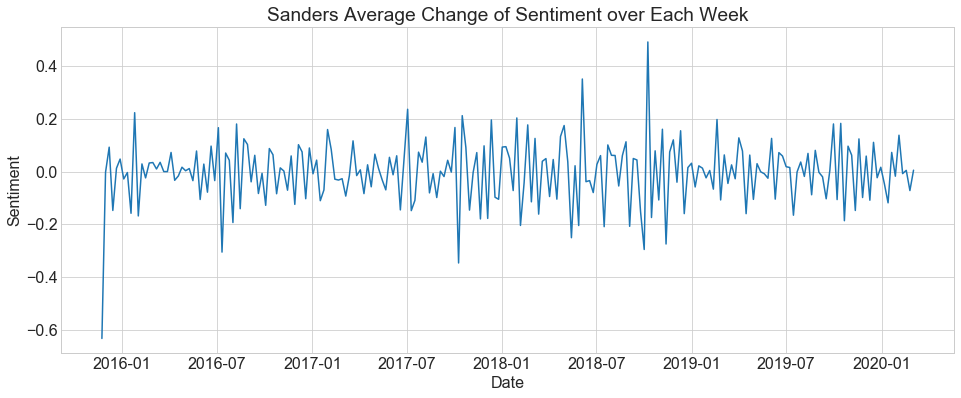

In [389]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(x=sandersDF["time"], y=sandersDF["change"], data=sandersDF)
plt.title("Sanders Average Change of Sentiment over Each Week")
ax.set_ylabel("Sentiment")
ax.set_xlabel("Date")

In [353]:
bidenTrain

,text,s_label
0,pete buttigieg is james madison reincarnated,-1
1,pete buttigiegs accomplishments in south bend1...,-1
2,pete buttigieg likes to stake claim that he im...,-1
3,pete buttigieg is able to talk about policyiss...,-1
4,thread for those of us myself included whove b...,-1
...,...,...
115,kamala harris elizabeth warren pete buttigieg...,0
116,pete buttigieg and elizabeth warren,0
117,this afternoon pete buttigieg successful perfo...,0
118,pete buttigieg kamala harris joe biden,0
